In [1]:
from __future__ import print_function
import torch as t

In [2]:
x = t.Tensor(5, 3)  
x

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.3116e-42, 0.0000e+00],
        [0.0000e+00, 1.2567e+19, 0.0000e+00]])

In [3]:
y = t.Tensor(5, 5)

In [4]:
y

tensor([[1.4588e-19, 1.6612e-04, 2.5467e-12, 4.0274e-11, 6.6292e-10],
        [9.3205e-09, 4.1723e-08, 4.9153e-14, 1.3563e-19, 1.8578e-01],
        [1.7592e+22, 1.8174e+31, 1.3563e-19, 1.7753e+28, 1.3458e-14],
        [9.3340e-09, 5.8253e-10, 5.8253e-10, 2.3301e-09, 1.1704e-19],
        [1.3563e-19, 1.3563e-19, 4.5071e+16, 1.4585e-19, 1.4585e-19]])

In [5]:
x = t.rand(5, 3)  
x

tensor([[0.1055, 0.3302, 0.0180],
        [0.8072, 0.2232, 0.9640],
        [0.5859, 0.4192, 0.4197],
        [0.5604, 0.2363, 0.5769],
        [0.3078, 0.1527, 0.3470]])

In [6]:
x = t.rand(5, 3)  
x

tensor([[0.1481, 0.8590, 0.2360],
        [0.5567, 0.9136, 0.3895],
        [0.6065, 0.5414, 0.4648],
        [0.0173, 0.5171, 0.6076],
        [0.0673, 0.0014, 0.1648]])

In [7]:
print(x.size()) 
x.size()[1], x.size(1) 

torch.Size([5, 3])


(3, 3)

In [10]:
import numpy as np

In [11]:
m, n, l1, l2 = 64, 1000, 100, 10

In [12]:
x = np.random.randn(m,n)
y = np.random.randn(m,l2)

w1 = np.random.randn(n,l1)
w2 = np.random.randn(l1,l2)
b1 = np.random.randn(1,l1)
b2 = np.random.randn(1,l2)

In [13]:
learning_rate = 1e-5
cost = []
for t in range(100):

    # forward pass

    z1 = np.dot(x,w1) + b1
    a1 = np.maximum(z1,0)
    z2 = np.dot(a1,w2) + b2

    # euclidean distance

    loss = np.square(z2 - y).sum()
    cost.append(loss)

    # calculate gradients

    dz2 = 2*(z2 - y)
    dw2 = np.dot(a1.T,dz2)/m
    db2 = dz2.sum()/m
    da1 = np.dot(dz2,w2.T)
    dz1 = da1.copy()
    dz1 = np.maximum(dz1,0)
    dw1 = np.dot(x.T,dz1)/m
    db1 = dz1.sum()/m

    # update parameters

    w2 -= learning_rate*dw2
    w1 -= learning_rate*dw1

    b2 -= learning_rate*db2
    b1 -= learning_rate*db1



In [14]:
import matplotlib.pyplot as plt

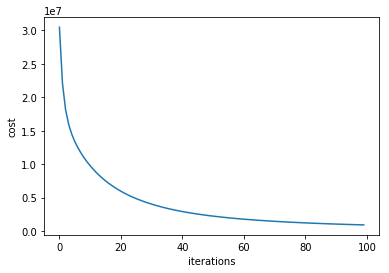

In [15]:
plt.xlabel("iterations")
plt.ylabel("cost")
plt.plot(cost)
plt.show()

In [35]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # PyTorch v0.4.0
model = Net().to(device)

summary(model, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 24, 24]             260
            Conv2d-2             [-1, 20, 8, 8]           5,020
         Dropout2d-3             [-1, 20, 8, 8]               0
            Linear-4                   [-1, 50]          16,050
            Linear-5                   [-1, 10]             510
Total params: 21,840
Trainable params: 21,840
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.06
Params size (MB): 0.08
Estimated Total Size (MB): 0.15
----------------------------------------------------------------


In [47]:
#%matplotlib inline
#from graphviz import Digraph

In [48]:
import torch
from torch.autograd import Variable
from torch import nn
from torchviz import make_dot, make_dot_from_trace

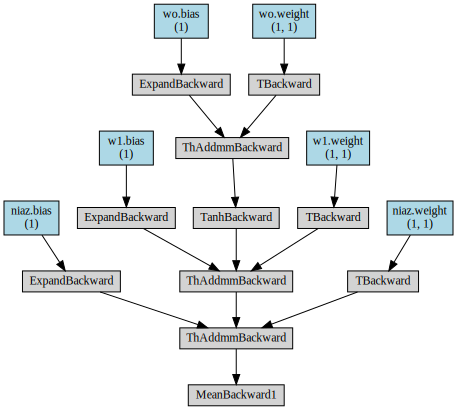

In [57]:
model1 = nn.Sequential()
model1.add_module('wo',nn.Linear(1,1))
model1.add_module('tanh',nn.Tanh())
model1.add_module('w1',nn.Linear(1,1))
model1.add_module('niaz',nn.Linear(1,1))
x = Variable(torch.randn(1,1))
y = model1(x)
make_dot(y.mean(),params=dict(model1.named_parameters()))

In [ ]:
#from torchsummary import summary
#summary(your_model, input_size=(channels, H, W))

In [61]:
from torchsummary import summary
summary(model1, input_size=(1,1,1))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1              [-1, 1, 1, 1]               2
              Tanh-2              [-1, 1, 1, 1]               0
            Linear-3              [-1, 1, 1, 1]               2
            Linear-4              [-1, 1, 1, 1]               2
Total params: 6
Trainable params: 6
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [60]:
summary(model1, (1, 1,1))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1              [-1, 1, 1, 1]               2
              Tanh-2              [-1, 1, 1, 1]               0
            Linear-3              [-1, 1, 1, 1]               2
            Linear-4              [-1, 1, 1, 1]               2
Total params: 6
Trainable params: 6
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [63]:
import torch #import torch library
import torch.nn as nn #import torch neural network library
import torch.nn.functional as F #import functional neural network module
import torch.optim as optim #import optimizer neural network module
from torch.autograd import Variable #import variable that connect to automatic differentiation
#from torchvision import datasets, transforms #import torchvision for datasets and transform

In [64]:
class CNN(nn.Module):
	def __init__(self):
		super(CNN, self).__init__() #load super class for training data
		self.conv1 = nn.Conv2d(1, 10, 5) #Convolutional modul: input 1, output 10, kernel 5
		self.conv2 = nn.Conv2d(10, 20, 5) #Convolutional modul: input 10, output 20, kernel 5
		self.maxpool = nn.MaxPool2d(2) #maxpooling modul: kernel
		self.relu = nn.ReLU() #activation relu modul
		self.dropout2d = nn.Dropout2d() #dropout modul
		self.fc1 = nn.Linear(320, 50) #Fully Connected modul: input, output
		self.fc2 = nn.Linear(50, 10)# Fully Connected modul: input, output

	def forward(self, x): #feed forward
		layer1 = self.relu(self.maxpool(self.conv1(x))) # layer1 = x -> conv1 -> maxpool -> relu
		layer2 = self.relu(self.maxpool(self.dropout2d(self.conv2(layer1)))) #layer2 = layer1 -> conv2 -> dropout -> maxpool -> relu
		layer3 = layer2.view(-1, 320) #make it flat from 0 - 320
		layer4 = self.relu(self.fc1(layer3)) #layer4 = layer3 -> fc1 -> relu
		layer5 = self.fc2(layer4) #layer5 = layer4 -> fc2
		return F.log_softmax(layer5) #softmax activation to layer5

In [65]:
class Dataset:
	def read(self):
		#load train and test loader that the range will be normalized into 0-1, batch size=1000 and shuffle the data
		train_loader = torch.utils.data.DataLoader( 
			datasets.MNIST('dataset/',train=True, download=False, 
				 transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))])),
				 batch_size=1000, shuffle=True)
		test_loader = torch.utils.data.DataLoader(
			datasets.MNIST('dataset/',train=False, 
				 transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))])),
				 batch_size=1000, shuffle=True)
		return train_loader, test_loader

In [68]:
model2 = CNN() #or you can choose: model = DNN()

In [82]:
summary(model2, (1, 28,28))

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 24, 24]             260
         MaxPool2d-2           [-1, 10, 12, 12]               0
              ReLU-3           [-1, 10, 12, 12]               0
            Conv2d-4             [-1, 20, 8, 8]           5,020
         Dropout2d-5             [-1, 20, 8, 8]               0
         MaxPool2d-6             [-1, 20, 4, 4]               0
              ReLU-7             [-1, 20, 4, 4]               0
            Linear-8                   [-1, 50]          16,050
              ReLU-9                   [-1, 50]               0
           Linear-10                   [-1, 10]             510
Total params: 21,840
Trainable params: 21,840
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.09
Params size (MB): 0.08
Estimated Tot

In [83]:
!pip install tensorboard_logger